In [14]:
import numpy as np
import matplotlib.pyplot as plt

Creating Fake Sensor Data

In [15]:
N_SAMPLES = 500

In [16]:
input_range = np.linspace(0,2*np.pi,N_SAMPLES,dtype=np.double)

In [17]:
signal = np.sin(input_range)

In [18]:
noise = np.random.normal(0,1,N_SAMPLES) # random noise with mu=0,sigma=1

In [19]:
assert noise.shape == input_range.shape

In [20]:
noisy_signal = signal + noise/5

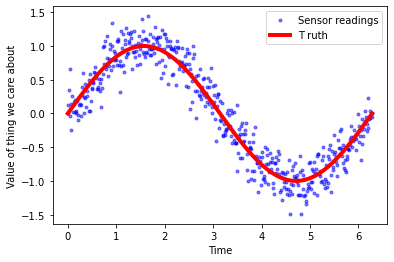

In [21]:
plt.plot(input_range,noisy_signal, 'b.', alpha=.5)
plt.plot(input_range, signal, 'r-', linewidth=4)
plt.legend(['Sensor readings', 'T ruth'])
plt.xlabel('Time')
plt.ylabel('Value of thing we care about')
plt.show() #of course, your plot will vary slightly, depending on random noise

In [22]:
del signal # With a noisy signal, we don't know the truth: we hope to reconstruct it.

In [23]:
from statsmodels.nonparametric.smoothers_lowess import lowess

In [24]:
filtered = lowess(noisy_signal, input_range, frac=0.1)

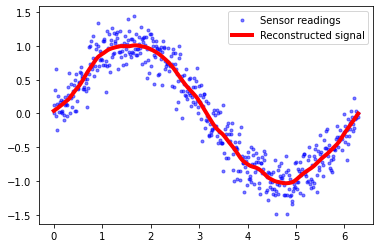

In [25]:
plt.plot(input_range, noisy_signal, 'b.', alpha=0.5)
plt.plot(filtered[:, 0], filtered[:, 1], 'r-', linewidth=4)
plt.legend(['Sensor readings', 'Reconstructed signal'])
plt.show()